In [145]:
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt
from matplotlib import colors as colors
from matplotlib.lines import Line2D
from matplotlib.colors import ListedColormap
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import multivariate_normal
import seaborn as sns

In [115]:
from IPython import get_ipython
get_ipython().magic('reset -sf')#清空變數

/var/folders/c2/2qrlwbxx6zdf4q3z4bkl3q5r0000gn/T/ipykernel_5188/2023174851.py:2: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  get_ipython().magic('reset -sf')#清空變數


In [130]:
from sklearn.discriminant_analysis  import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis  import QuadraticDiscriminantAnalysis
data_dir = '../ml_data/'
D = np.loadtxt(data_dir + 'la_1.txt', comments='%') 
X = D[:, 0:2]
y = D[:,2]
Lda = LinearDiscriminantAnalysis(tol = 1e-6) 
Lda.fit(X, y)
K = Lda.intercept_
L = Lda.coef_
MissClassRateLDA = 1 - Lda.score(X, y)

/var/folders/c2/2qrlwbxx6zdf4q3z4bkl3q5r0000gn/T/ipykernel_5188/875257559.py:33: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.pcolormesh(xx, yy, Z, cmap = 'red_blue_classes', norm = colors.Normalize(0., 1.), shading = 'auto', zorder = 0)


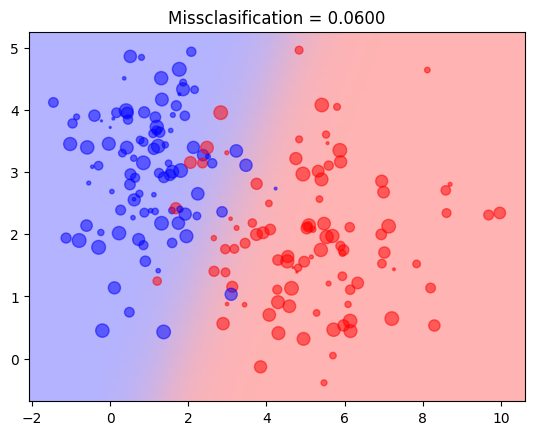

In [131]:
from matplotlib import colors 
import matplotlib.pyplot as plt
data_dir = '../ml_data/'
D = np.loadtxt(data_dir + 'la_1.txt', comments='%') 
area = 2 * np.random.randint(50, size = D[:, 0].size) 
grp_color = [[1,0,0] if i == 0 else [0,0,1] for i in y] 
plt.scatter(D[:, 0], D[:, 1], c = grp_color, s = area, alpha = 0.5, marker = 'o' )
plt.grid(True)
#-----------------------------------
X = D[:, 0:2]
y = D[:,2]
Lda = LinearDiscriminantAnalysis(tol = 1e-6) 
Lda.fit(X, y)
K = Lda.intercept_
L = Lda.coef_
MissClassRateLDA = 1 - Lda.score(X, y)
plt.title('Missclasification = {:.4f}'.format(MissClassRateLDA))
#-----------------------------------
nx, ny = 100, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
x_ = np.linspace(x_min, x_max, nx) 
y_ = np.linspace(y_min, y_max, ny) 
xx, yy = np.meshgrid(x_, y_)
v=np.c_[xx.ravel(), yy.ravel()]
Z1 = Lda.predict_proba(v) 
# Z1 = Lda.predict_proba(np.c_[xx.ravel(), yy.ravel()]) #ravel轉為一維
Z = Z1[:, 1].reshape(xx.shape)
# Define pseudo colors
cdit = {'red': [(0, 1, 1), (1, 0.7, 0.7)], 'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)], 'blue': [(0, 0.7, 0.7), (1, 1, 1)]}
cmap = colors.LinearSegmentedColormap( 'red_blue_classes', cdit)
# plt.cm.register_cmap(cmap = cmap)
plt.pcolormesh(xx, yy, Z, cmap = 'red_blue_classes', norm = colors.Normalize(0., 1.), shading = 'auto', zorder = 0)

In [132]:
Qda = QuadraticDiscriminantAnalysis(tol = 1e-6,  store_covariance = True)
Qda.fit(X, y)
MissClassRateLDA = 1 - Qda.score(X, y)

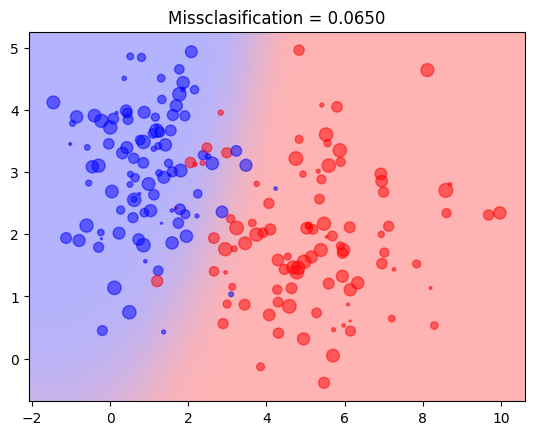

In [143]:
from matplotlib import colors 
import matplotlib.pyplot as plt
data_dir = '../ml_data/'
D = np.loadtxt(data_dir + 'la_1.txt', comments='%') 
area = 2 * np.random.randint(50, size = D[:, 0].size) 
grp_color = [[1,0,0] if i == 0 else [0,0,1] for i in y] 
plt.scatter(D[:, 0], D[:, 1], c = grp_color, s = area, alpha = 0.5, marker = 'o' )
#-----------------------------------
X = D[:, 0:2]
y = D[:,2]
Qda = QuadraticDiscriminantAnalysis(tol = 1e-6, store_covariance = True)
Qda.fit(X, y)
MissClassRateQDA = 1 - Qda.score(X, y)
plt.title('Missclasification = {:.4f}'.format(MissClassRateQDA))

nx, ny = 100, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
x_ = np.linspace(x_min, x_max, nx) 
y_ = np.linspace(y_min, y_max, ny) 
xx, yy = np.meshgrid(x_, y_)
Z = Qda.predict_proba(np.c_[xx.ravel(), yy.ravel()]) #predict_proba 計算後驗機率值 #這個是得分,每個分類器的得分，取最大得分對應的類。
Z = Z[:, 1].reshape(xx.shape)
# Define pseudo colors
cdit = {'red': [(0, 1, 1), (1, 0.7, 0.7)], 'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)], 'blue': [(0, 0.7, 0.7), (1, 1, 1)]}
cmap = colors.LinearSegmentedColormap('red_blue_classes', cdit)
# plt.cm.register_cmap(cmap = cmap)
plt.pcolormesh(xx, yy, Z, cmap = 'red_blue_classes', norm = colors.Normalize(0., 1.), shading = 'auto', zorder = 0)

## 11/30上課範例

Training error for LDA=0.0900
Training error for QDA=0.0650


/var/folders/c2/2qrlwbxx6zdf4q3z4bkl3q5r0000gn/T/ipykernel_5188/708233648.py:2: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  get_ipython().magic('reset -sf')  # 清空變數


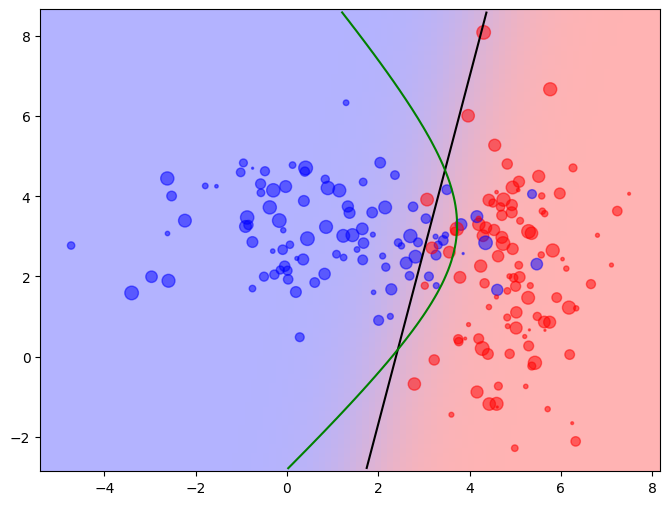

In [134]:
from IPython import get_ipython
get_ipython().magic('reset -sf')  # 清空變數
import numpy.linalg as LA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
from matplotlib import colors 
import numpy as np



data_dir = '../ml_data/'
D = np.loadtxt(data_dir + 'la_2.txt', comments='%')
fig, ax = plt.subplots(figsize=(8, 6))
area = 2 * np.random.randint(50, size=D[:, 0].size)
grp_color = [[1, 0, 0] if i == 0 else [0, 0, 1] for i in D[:, 2]]
plt.scatter(D[:, 0], D[:, 1], c=grp_color, s=area, alpha=0.5, marker='o')

X = D[:, 0:2]
y = D[:, 2]
Lda = LinearDiscriminantAnalysis(tol=1e-6)
Lda.fit(X, y) #learning
#intrcp = Lda.intercept_
#coeffs = Lda.coef_
trainErrLDA = 1 - Lda.score(X, y)
#print(dir(Lda))
print("Training error for LDA={:.4f}".format(trainErrLDA))



Qda = QuadraticDiscriminantAnalysis(tol = 1e-6, store_covariance = True)
Qda.fit(X, y)
trainQDA = 1 - Qda.score(X, y)
print("Training error for QDA={:.4f}".format(trainQDA))


nx, ny = 100, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
x_ = np.linspace(x_min, x_max, nx) 
y_ = np.linspace(y_min, y_max, ny) 
xx, yy = np.meshgrid(x_, y_)
#LDA
Z = Lda.predict_proba(np.c_[xx.ravel(), yy.ravel()]) #計算後驗機率 #ravel轉一維 
Z = Z[:, 1].reshape(xx.shape)
contoursLDA=plt.contour(xx,yy,Z,[0.5],colors="black")

#QDA
Z1 = Qda.predict_proba(np.c_[xx.ravel(), yy.ravel()]) #計算後驗機率 #ravel轉一維 
Z1 = Z1[:, 1].reshape(xx.shape)
contoursQDA=plt.contour(xx,yy,Z1,[0.5],colors="green")


cdit = {'red': [(0, 1, 1), (1, 0.7, 0.7)], 'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)], 'blue': [(0, 0.7, 0.7), (1, 1, 1)]}
cmap = colors.LinearSegmentedColormap('red_blue_classes', cdit)
#plt.cm.register_cmap(cmap = cmap)
plt.pcolormesh(xx, yy, Z, cmap = 'red_blue_classes', norm = colors.Normalize(0., 1.), shading = 'auto', zorder = 0)
plt.show()


## split資料 以la＿2模擬 LDA

In [135]:
from sklearn.model_selection import train_test_split
data_dir = '../ml_data/'
D = np.loadtxt(data_dir + 'la_2.txt', comments='%')
X = D[:, 0:2]
y = D[:, 2]


Lda = LinearDiscriminantAnalysis(tol=1e-6)
K = 100
LDA_trainingErr = np.zeros(K)
LDA_testingErr =np.zeros(K)

for i in range(K):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    Lda.fit(X_train, y_train)
    LDA_trainingErr[i] = 1 - Lda.score(X_train, y_train)
    LDA_testingErr[i] = 1 - Lda.score(X_test, y_test)
print('LDA training Error:{:.4f}'.format(LDA_trainingErr.mean()))
print('LDA testing Error:{:.4f}'.format(LDA_testingErr.mean()))


LDA training Error:0.0919
LDA testing Error:0.0980


# 三組資料LDA

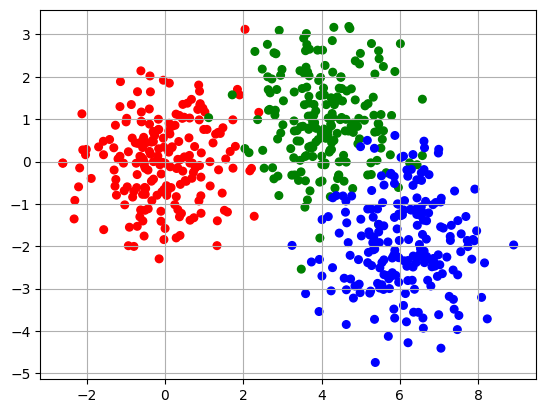

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
n1, n2, n3 = 200, 200,200
m1, m2 ,m3= np.array([0, 0]), np.array([4, 1]), np.array([6, -2])
Cov1 = np.array([[1, 0], [0, 1]])
Cov2 = np.array([[1, 0], [0, 1]])
Cov3 = np.array([[1, 0], [0, 1]])
mvn1 = multivariate_normal(mean = m1, cov = Cov1)
mvn2 = multivariate_normal(mean = m2, cov = Cov2)
mvn3 = multivariate_normal(mean = m3, cov = Cov3)
A, B ,C= mvn1.rvs(n1), mvn2.rvs(n2),mvn3.rvs(n3)
X = np.vstack((A, B,C))
y = np.hstack((np.zeros(n1), np.ones(n2), np.ones(n2)*2))
np.savetxt('logistic.txt', np.c_[X, y],\
     fmt = "%.4f %.4f %d", header = "X1 X2 y")
colors = ['red' if i == 0 else 'green'if i==1 else 'blue' for i in y]
plt.scatter(X[:, 0], X[:, 1], \
        c=colors, s=30, marker="o")
plt.grid(True)
plt.show()

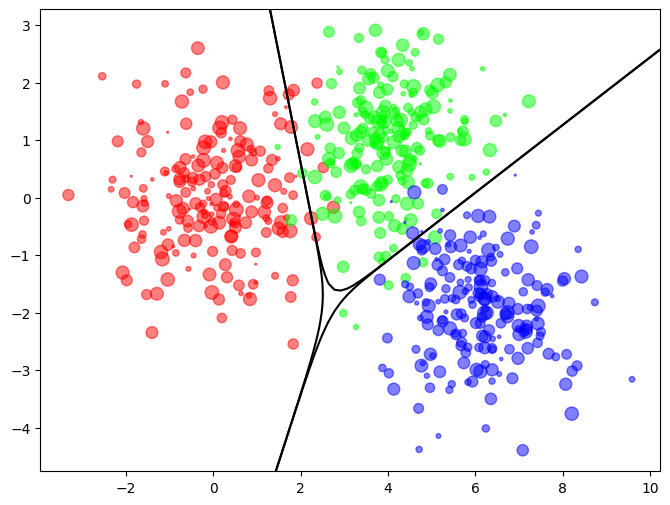

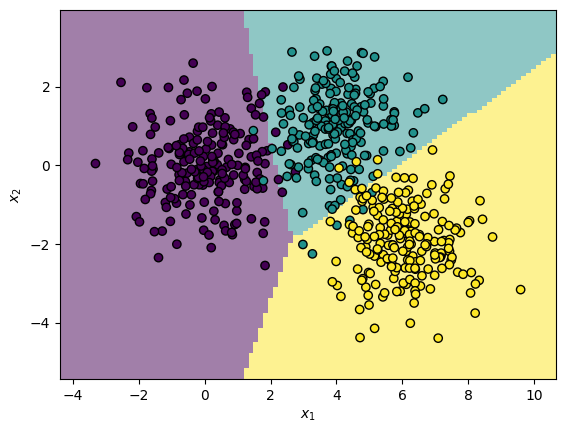

In [92]:
# from IPython import get_ipython
# get_ipython().magic('reset -sf')  # 清空變數
import numpy.linalg as LA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
from matplotlib import colors 
import numpy as np
from sklearn.inspection import DecisionBoundaryDisplay

data_dir = '../ml_data/'
D = np.loadtxt(data_dir + 'logistic.txt', comments='#')
fig, ax = plt.subplots(figsize=(8, 6))
area = 2 * np.random.randint(50, size=D[:, 0].size)
grp_color = [[1, 0, 0] if i == 0 else [0,1,0] if i==1 else [0, 0, 1] for i in D[:, 2]]
plt.scatter(D[:, 0], D[:, 1], c=grp_color, s=area, alpha=0.5, marker='o')

X = D[:, 0:2]
y = D[:, 2]
Lda = LinearDiscriminantAnalysis(tol=1e-6)
LDA=Lda.fit(X, y) #learning


nx, ny = 100, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
x_ = np.linspace(x_min, x_max, nx) 
y_ = np.linspace(y_min, y_max, ny) 
xx, yy = np.meshgrid(x_, y_)
#LDA
Z = Lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
c = ['r','b','g']    
for i in range(3):
    tmp = Z[:,i].reshape(xx.shape)
    plt.contour(xx,yy,tmp,[0.5],colors='black')
disp = DecisionBoundaryDisplay.from_estimator(
     LDA, X, response_method="predict",
     plot_method='pcolormesh',
     shading="auto",
     xlabel='$x_1$', ylabel='$x_2$',
     alpha=0.5,
 )
disp.ax_.scatter(X[:, 0], X[:, 1], c=y,edgecolor="k")
# Z = Lda.predict_proba(np.c_[xx.ravel(), yy.ravel()]) #計算後驗機率 #ravel轉一維 
# Z = Z[:, 1].reshape(xx.shape)
# contoursLDA=plt.contour(xx,yy,Z,[0.5],colors="black")

# cdit = {'red': [(0, 1, 1), (1, 0.7, 0.7)], 'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)], 'blue': [(0, 0.7, 0.7), (1, 1, 1)]}
# cmap = colors.LinearSegmentedColormap('red_blue_classes', cdit)
# # plt.cm.register_cmap(cmap = cmap)
# plt.pcolormesh(xx, yy, Z, cmap = 'red_blue_classes', norm = colors.Normalize(0., 1.), shading = 'auto', zorder = 0)
# plt.show()

# KNN

In [110]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

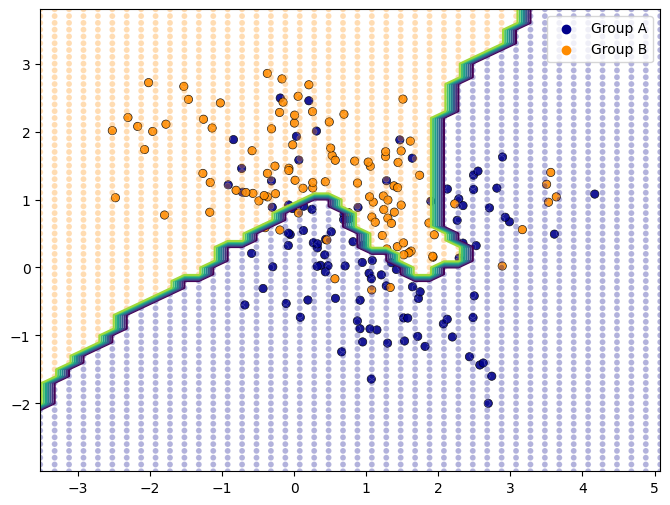

In [55]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data_dir = '../ml_data/'
D = np.loadtxt(data_dir + 'la_3.txt', comments='%') 
X = D[:, 0:2]
y = D[:,2].astype('int') # convert to integers 調整為整數
n = len(y)
cmap_bold = ['darkblue', 'darkorange']
Group_name = np.array(['Group A', 'Group B'])#給群組名稱
plt.figure(figsize=(8, 6)) 
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = Group_name[y], palette = cmap_bold,  alpha = 0.9, edgecolor = "black")
K = 15
intrvl = 0.2 # grid interval
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1 
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, intrvl),  np.arange(y_min, y_max, 0.1)) # grid points: matrices np.zeros(xx.size)#控制數量
z=np.zeros(xx.size)
for i in range(xx.size) :
    tmp = np.tile([xx.ravel()[i], yy.ravel()[i]], (n, 1)) #tile複製 #ravel拉開 貼成n*1的形狀 兩個 200*2
    d = np.linalg.norm(tmp - X, axis = 1) # n distances 
    # d=((tmp-X)**2).sum(axis=1)
    idx = np.argsort(d) # sorting K distances
    z[i] = np.mean(y[idx[:K]])
z =[0 if i < 0.5 else 1 for i in z]
sns.scatterplot(x = xx.ravel(), y = yy.ravel(), size = 2,markers = '.', palette = cmap_bold, hue = z, alpha = 0.3, legend = False)
Z = np.reshape(z, xx.shape) # reshape z to a matrix 
plt.contour(xx, yy, Z)

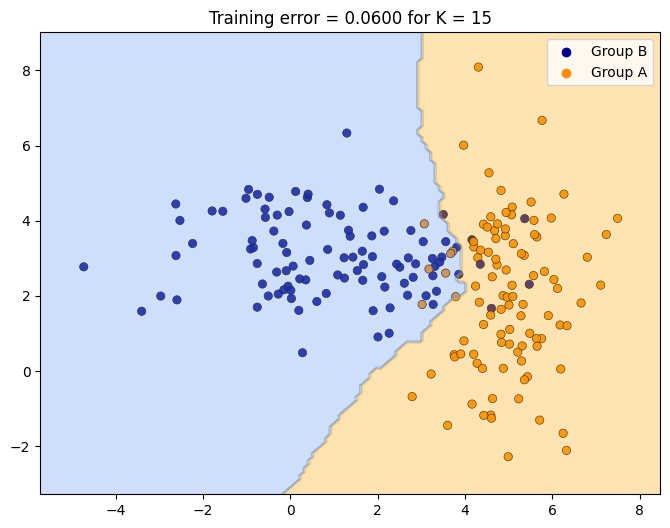

In [5]:
from sklearn import neighbors
from matplotlib.colors import ListedColormap
img_dir = '../images/'
data_dir = '../ml_data/'
D = np.loadtxt(data_dir + 'la_2.txt', comments='%') 
X = D[:, 0:2]
y = D[:,2].astype('int') # convert to integers 調整為整數
n = len(y)
cmap_bold = ['darkblue', 'darkorange']
Group_name = np.array(['Group A', 'Group B'])#給群組名稱
plt.figure(figsize=(8, 6)) 
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = Group_name[y], palette = cmap_bold,  alpha = 0.9, edgecolor = "black")
K = 15
weights = 'uniform'
Knn = neighbors.KNeighborsClassifier(K, weights = weights) 
Knn.fit(X, y)
trainingErr = 1 - Knn.score(X, y)
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1

xx,yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

z =Knn.predict(np.c_[xx.ravel(),yy.ravel()])
Z =z.reshape(xx.shape)
cmap_light = ListedColormap(['orange','cornflowerblue']) 
plt.contourf(xx, yy, Z, cmap = cmap_light, alpha = 0.3) 
plt.title('Training error = %.4f for K = %i' % (trainingErr,K))
plt.savefig(img_dir+"KNN.pdf", format='pdf')

/var/folders/c2/2qrlwbxx6zdf4q3z4bkl3q5r0000gn/T/ipykernel_27733/997353712.py:2: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  get_ipython().magic('reset -sf')  # 清空變數


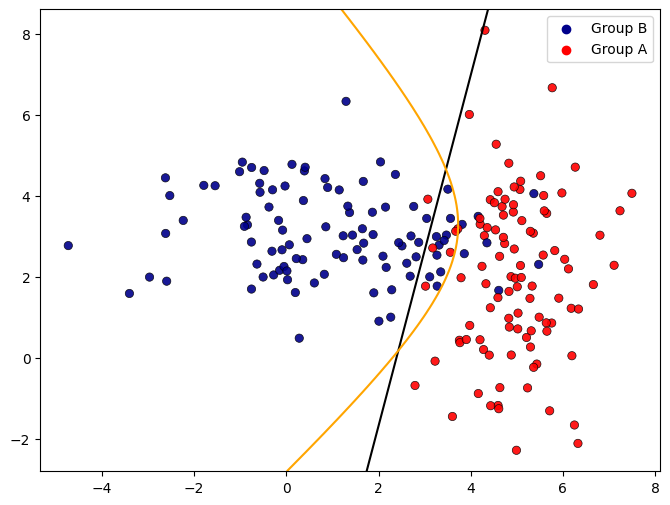

In [2]:
from IPython import get_ipython
get_ipython().magic('reset -sf')  # 清空變數
import numpy.linalg as LA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
from matplotlib import colors 
import seaborn as sns
import numpy as np
img_dir = '../images/'



data_dir = '../ml_data/'
D = np.loadtxt(data_dir + 'la_2.txt', comments='%')
X = D[:, 0:2]
y = D[:, 2].astype('int')
fig, ax = plt.subplots(figsize=(8, 6))
Group_name = np.array(['Group A', 'Group B'])#給群組名稱
cmap_bold = ['darkblue', 'red']
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = Group_name[y], palette = cmap_bold,  alpha = 0.9, edgecolor = "black")

Lda = LinearDiscriminantAnalysis(tol=1e-6)
Lda.fit(X, y) #learning



Qda = QuadraticDiscriminantAnalysis(tol = 1e-6, store_covariance = True)
Qda.fit(X, y)


nx, ny = 100, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
x_ = np.linspace(x_min, x_max, nx) 
y_ = np.linspace(y_min, y_max, ny) 
xx, yy = np.meshgrid(x_, y_)
#LDA
Z = Lda.predict_proba(np.c_[xx.ravel(), yy.ravel()]) #計算後驗機率 #ravel轉一維 
Z = Z[:, 1].reshape(xx.shape)
contoursLDA=plt.contour(xx,yy,Z,[0.5],colors="black")

#QDA
Z1 = Qda.predict_proba(np.c_[xx.ravel(), yy.ravel()]) #計算後驗機率 #ravel轉一維 
Z1 = Z1[:, 1].reshape(xx.shape)
contoursQDA=plt.contour(xx,yy,Z1,[0.5],colors="orange")
plt.savefig(img_dir+'LDA&QDA.pdf', format='pdf')

# cdit = {'red': [(0, 1, 1), (1, 0.7, 0.7)], 'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)], 'blue': [(0, 0.7, 0.7), (1, 1, 1)]}
# cmap = colors.LinearSegmentedColormap('red_blue_classes', cdit)
# # plt.cm.register_cmap(cmap = cmap)
# plt.pcolormesh(xx, yy, Z1, cmap = 'red_blue_classes', norm = colors.Normalize(0., 1.), shading = 'auto', zorder = 0)
# plt.show()
